In [1]:
import numpy as np
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU, Conv2D, Conv1D, MaxPooling2D,Dropout,UpSampling2D,UpSampling3D,concatenate,Conv2DTranspose,Add
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

import glob
from PIL import Image
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split

In [2]:
base_path = "C:/Users/s4601130/Downloads"
x_files = glob.glob(base_path + "/ISIC2018_Task1-2_Training_Input_x2/*.jpg")
y_files = glob.glob(base_path + "/ISIC2018_Task1_Training_GroundTruth_x2/*.png")
x_files.sort()
y_files.sort()
assert(len(x_files) == len(y_files))

In [4]:
x=[]
y=[]
for i in range(len(x_files)):
    x_tmp = Image.open(x_files[i])
    y_tmp = Image.open(y_files[i])
    
    x_tmp = np.array(x_tmp.resize((256,256), Image.ANTIALIAS))
    y_tmp = np.array(y_tmp.resize((256,256), Image.ANTIALIAS))
    
    x.append(x_tmp)
    y.append(y_tmp)
    
x = np.array(x)
y = np.expand_dims(np.array(y), -1)


print(x.shape)
print(y.shape)
#print(np.unique(y))


(2594, 256, 256, 3)
(2594, 256, 256, 1)


In [5]:
y=y/255.0
y= np.around(y)




In [6]:
print(np.unique(y))


[0. 1.]


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [27]:
model.compile(loss='binary_crossentropy',
optimizer=tensorflow.keras.optimizers.Adam(learning_rate=5e-4),
metrics=['accuracy'])

In [10]:
print(y_train.shape)
print(y_val.shape)

(1556, 256, 256, 1)
(519, 256, 256, 1)


In [28]:
moel_result = model.fit(x_train, y_train, batch_size=8, epochs=40, validation_data = (x_val, y_val))

Train on 1556 samples, validate on 519 samples
Epoch 1/40
1556/1556 [==============================] - 16s 10ms/sample - loss: 0.2145 - accuracy: 0.9188 - val_loss: 0.2106 - val_accuracy: 0.9201
Epoch 2/40
1556/1556 [==============================] - 14s 9ms/sample - loss: 0.1966 - accuracy: 0.9246 - val_loss: 0.1757 - val_accuracy: 0.9344
Epoch 3/40
1556/1556 [==============================] - 14s 9ms/sample - loss: 0.1857 - accuracy: 0.9286 - val_loss: 0.1828 - val_accuracy: 0.9364
Epoch 4/40
1556/1556 [==============================] - 14s 9ms/sample - loss: 0.1817 - accuracy: 0.9287 - val_loss: 0.2044 - val_accuracy: 0.92910.1862 - ac
Epoch 5/40
1556/1556 [==============================] - 14s 9ms/sample - loss: 0.1790 - accuracy: 0.9295 - val_loss: 0.1744 - val_accuracy: 0.9360
Epoch 6/40
1556/1556 [==============================] - 14s 9ms/sample - loss: 0.1694 - accuracy: 0.9340 - val_loss: 0.1764 - val_accuracy: 0.9347
Epoch 7/40
1556/1556 [==============================] - 14s

In [29]:
y_pred = model.predict(x_test)

In [24]:
print(y_pred.shape)
print(y_test.shape)

(519, 256, 256, 1)
(519, 256, 256, 1)


In [30]:
scores = model.evaluate(x_test,y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 94.66%


In [31]:
def dice_score(y_true, y_pred):
    

    intersection = tensorflow.reduce_sum(y_true*y_pred, axis= [1,2])

    denominator = tensorflow.reduce_sum(y_true +y_pred, axis= [1,2])
    
    dice_score= tensorflow.reduce_mean((2.0*intersection)/(denominator+ 1e-6), axis=0)
    return dice_score
res = dice_score(y_test, y_pred)
print(res)

tf.Tensor([0.81133067], shape=(1,), dtype=float64)


In [17]:
inputs = tensorflow.keras.Input(shape=( 256,256, 3))
conv_layer = Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), padding = 'same')(inputs)
conv_layer1 = Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), padding = 'same')(conv_layer)
pool1 =  Dropout(0.3)(conv_layer1)
conv_layer1 = Conv2D(16, (3,3), activation = LeakyReLU(alpha=0.01), padding = 'same')(pool1)
conv_layer1 = Add()([conv_layer, conv_layer1])

conv_layer_1s = Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), padding = 'same', strides=(2,2))(conv_layer1)

conv_layer2 = Conv2D(32,(3,3) , activation = LeakyReLU(alpha=0.01), padding = 'same')(conv_layer_1s)
pool2 =  Dropout(0.3)(conv_layer2)
conv_layer2 = Conv2D(32, (3,3), activation = LeakyReLU(alpha=0.01), padding = 'same')(pool2)
conv_layer2 = Add()([conv_layer_1s, conv_layer2])

conv_layer_2s = Conv2D(64, (3,3), activation = LeakyReLU(alpha=0.01), padding = 'same', strides=(2, 2))(conv_layer2)

conv_layer3 = Conv2D(64,(3,3) , activation = LeakyReLU(alpha=0.01), padding = 'same')(conv_layer_2s)
pool3 =  Dropout(0.3)(conv_layer3)
conv_layer3 = Conv2D(64, (3,3),activation = LeakyReLU(alpha=0.01), padding = 'same')(pool3)
conv_layer3 = Add()([conv_layer_2s, conv_layer3])

conv_layer_3s = Conv2D(128, (3, 3), activation = LeakyReLU(alpha=0.01), padding = 'same', strides=(2, 2))(conv_layer3)

conv_layer4 = Conv2D(128,(3,3) , activation = LeakyReLU(alpha=0.01), padding = 'same')(conv_layer_3s)
pool4 =  Dropout(0.3)(conv_layer4)
conv_layer4 = Conv2D(128, (3,3), activation = LeakyReLU(alpha=0.01), padding = 'same')(pool4)
conv_layer4 = Add()([conv_layer_3s, conv_layer4])


conv_layer_4s = Conv2D(256, (3, 3), activation = LeakyReLU(alpha=0.01), padding = 'same', strides=(2,2))(conv_layer4)

conv_layer5 = Conv2D(256,(3,3) , activation = LeakyReLU(alpha=0.01), padding = 'same')(conv_layer_4s)
pool5 =  Dropout(0.3)(conv_layer5)
conv_layer5 = Conv2D(256, (3,3), activation = LeakyReLU(alpha=0.01), padding = 'same')(pool5)
conv_layer5 = Add()([conv_layer_4s, conv_layer5])

layer_6 = UpSampling2D()(conv_layer5)

con1 = concatenate([layer_6, conv_layer4])

up1 = Conv2D(128,(3,3) , activation = LeakyReLU(alpha=0.01), padding = 'same')(con1)
up1 = Conv2D(128, (1,1),activation = LeakyReLU(alpha=0.01), padding = 'same')(up1)

layer_7 = UpSampling2D()(up1)

con2 = concatenate([layer_7, conv_layer3])

up2 = Conv2D(64,(3,3) , activation = LeakyReLU(alpha=0.01), padding = 'same')(con2)
up2 = Conv2D(64, (1,1),activation = LeakyReLU(alpha=0.01), padding = 'same')(up2)

seg1 = Conv2D(4,(3,3) , activation = LeakyReLU(alpha=0.01), padding = 'same')(up2)
seg1 = UpSampling2D()(seg1)

layer_8 = UpSampling2D()(up2)

con3 = concatenate([layer_8, conv_layer2])

up3 = Conv2D(32,(3,3) ,activation = LeakyReLU(alpha=0.01), padding = 'same')(con3)
up3 = Conv2D(32, (1,1), activation = LeakyReLU(alpha=0.01), padding = 'same')(up3)

seg2 = Conv2D(4,(3,3) , activation = LeakyReLU(alpha=0.01), padding = 'same')(up3)

layer_9 = UpSampling2D()(up3)

con4 = concatenate([layer_9, conv_layer1])

layer_10 = Conv2D(32, (1,1), activation = LeakyReLU(alpha=0.01), padding = 'same')(con4)

seg3 = Conv2D(4,(3,3) , activation = LeakyReLU(alpha=0.01), padding = 'same')(layer_10)

added_seg12 =Add()([seg1, seg2])
added_seg12= UpSampling2D()(added_seg12)
added_seg123= Add()([added_seg12, seg3])

conv_final = Conv2D(1, 1, activation = "sigmoid")(added_seg123)
model = tensorflow.keras.Model(inputs=inputs, outputs=conv_final)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 256, 256, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 256, 256, 16) 2320        conv2d_26[0][0]                  
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 256, 256, 16) 0           conv2d_27[0][0]                  
____________________________________________________________________________________________

In [32]:
import matplotlib
import matplotlib.pyplot as plt

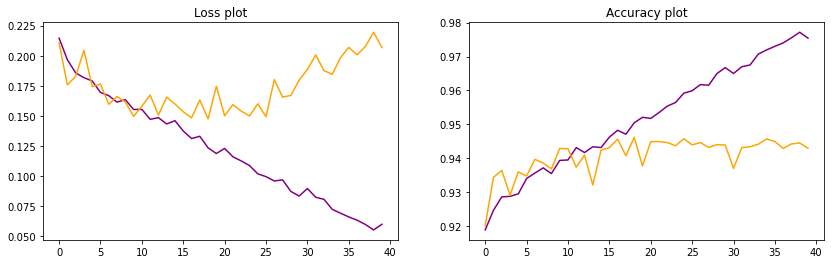

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].set_title("Loss plot")
axs[0].plot(moel_result.history['loss'], color='purple', label='train')
axs[0].plot(moel_result.history['val_loss'], color='orange', label='test')
axs[1].set_title("Accuracy plot")
axs[1].plot(moel_result.history['accuracy'], color='purple', label='train')
axs[1].plot(moel_result.history['val_accuracy'], color='orange', label='test')